In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab_data = pd.read_csv('../data/ab_data.csv')

In [3]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [4]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [7]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count']*100

daily_data[daily_data['timestamp'] == '2017-01-05']

,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964


In [8]:
sample_a = pd.read_csv('../data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('../data/ab_test-redesign_sample_b.csv')

In [24]:
from operator import index


sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])


sample_a_group = sample_a.groupby(['date']).agg({'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'}).reset_index()
sample_b_group = sample_b.groupby(['date']).agg({'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'}).reset_index()

sample_a_group
display(sample_a_group[sample_a_group['date'] == '2020-11-08'])
display(sample_b_group[sample_b_group['date'] == '2020-11-08'])

,date,cid,transactions,revenue
2,2020-11-08,3354,25,846051


,date,cid,transactions,revenue
2,2020-11-08,3291,24,3044842


In [32]:
sample_a_group['cum_cid'] = sample_a_group['cid'].cumsum()
sample_a_group['cum_trans'] = sample_a_group['transactions'].cumsum()
sample_a_group['cum_revenue'] = sample_a_group['revenue'].cumsum()

sample_b_group['cum_cid'] = sample_b_group['cid'].cumsum()
sample_b_group['cum_trans'] = sample_b_group['transactions'].cumsum()
sample_b_group['cum_revenue'] = sample_b_group['revenue'].cumsum()

sample_a_group['cum_conv'] = sample_a_group['cum_trans']/sample_a_group['cum_cid']*100
sample_b_group['cum_conv'] = sample_b_group['cum_trans']/sample_b_group['cum_cid']*100


display(sample_a_group['cum_conv'].mean())
display(sample_b_group['cum_conv'].mean())

display(sample_a_group)
display(sample_b_group)



0.7127554606160045

0.7621783890588011

,date,cid,transactions,revenue,cum_cid,cum_trans,cum_revenue,cum_conv
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524


,date,cid,transactions,revenue,cum_cid,cum_trans,cum_revenue,cum_conv
0,2020-11-06,2499,19,996645,2499,19,996645,0.760304
1,2020-11-07,2804,19,555499,5303,38,1552144,0.716576
2,2020-11-08,3291,24,3044842,8594,62,4596986,0.721434
3,2020-11-09,3062,25,1285836,11656,87,5882822,0.746397
4,2020-11-10,3072,30,2414726,14728,117,8297548,0.794405
5,2020-11-11,3208,22,3555727,17936,139,11853275,0.774978
6,2020-11-12,3494,25,915653,21430,164,12768928,0.765282
7,2020-11-13,3606,37,1703475,25036,201,14472403,0.802844
8,2020-11-14,3276,34,2369998,28312,235,16842401,0.830037
9,2020-11-15,3919,27,1147144,32231,262,17989545,0.812882


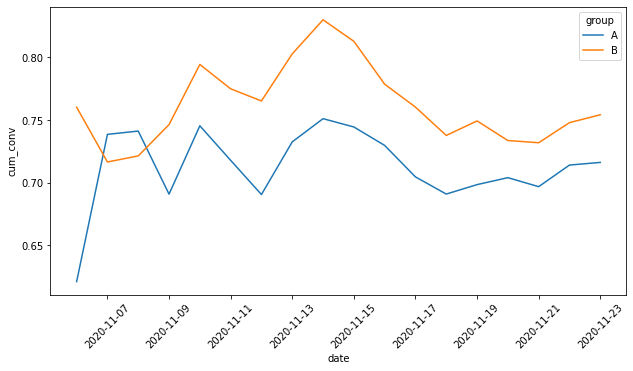

In [48]:
sample_a_group['group'] = 'A'
sample_b_group['group'] = 'B'

ab = pd.concat([sample_a_group, sample_b_group], sort=False, axis=0, ignore_index=True)

fig02 = plt.figure(figsize=(8, 4))
ax03 = fig02.add_axes([1, 1, 1, 1])
sns.lineplot(x='date', y='cum_conv', data=ab, ax=ax03, hue='group')
ax03.xaxis.set_tick_params(rotation = 45)


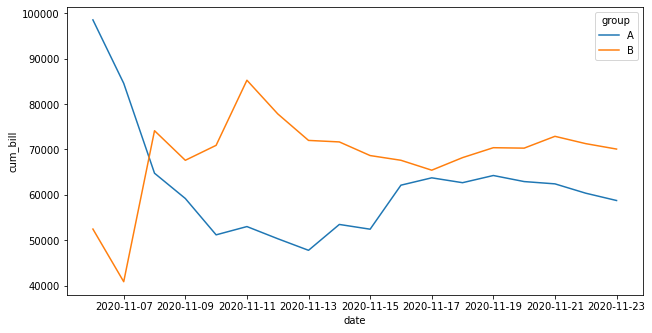

In [49]:
ab['cum_bill'] = ab['cum_revenue']/ab['cum_trans']

fig03 = plt.figure(figsize=(8, 4))
ax04 = fig03.add_axes([1, 1, 1, 1])
sns.lineplot(x='date', y='cum_bill', data=ab, ax=ax04, hue='group')
ax03.xaxis.set_tick_params(rotation = 45)

# Юнит 5

In [52]:
import scipy.stats as ss

In [53]:
ab['conv'] = ab['transactions']/ab['cid']*100
display(ab)

_, p = ss.ttest_ind(a=ab[ab['group'] == 'A']['conv'], b=ab[ab['group'] == 'B']['conv'], alternative='less')

display(p)

,date,cid,transactions,revenue,cum_cid,cum_trans,cum_revenue,cum_conv,group,cum_bill,conv
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,A,98579.937500,0.621118
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,A,84593.974359,0.850592
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,A,64769.000000,0.745379
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,A,59195.682927,0.556586
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,A,51180.450450,0.959629
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,A,53005.276923,0.590429
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,A,50325.671141,0.548024
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,A,47769.410811,0.979325
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,A,53472.641860,0.889680
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,A,52423.917355,0.695697


0.2463797159612297

In [57]:
ab['bill'] = ab['revenue']/ab['transactions']
display(ab)

_, p1 = ss.shapiro(ab[ab['group'] == 'A']['bill'])
_, p2 = ss.shapiro(ab[ab['group'] == 'B']['bill'])

display(p1)
display(p2)

,date,cid,transactions,revenue,cum_cid,cum_trans,cum_revenue,cum_conv,group,cum_bill,conv,bill
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,A,98579.937500,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,A,84593.974359,0.850592,74864.608696
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,A,64769.000000,0.745379,33842.040000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,A,59195.682927,0.556586,39379.444444
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,A,51180.450450,0.959629,28516.689655
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,A,53005.276923,0.590429,63666.105263
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,A,50325.671141,0.548024,31991.526316
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,A,47769.410811,0.979325,37189.333333
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,A,53472.641860,0.889680,88642.566667
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,A,52423.917355,0.695697,44072.962963


0.009879971854388714

0.02169591188430786

In [58]:
_, p3 = ss.mannwhitneyu(x = ab[ab['group'] == 'A']['bill'], y=ab[ab['group'] == 'B']['bill'], alternative='less')

display(p3)

0.08937067987846736

In [97]:
def dov_int_sigma(n, x_mean, sigma, gamma):
    alpha = 1 - gamma
    z_crit = -ss.norm.ppf(alpha/2)
    eps = z_crit * sigma/(n ** 0.5)
    display(f'Z-критическое: {z_crit}')
    display(f'Погрешность: +/-{eps}')
    return (x_mean - eps, x_mean + eps)

In [98]:
dov_int_sigma(n=64, x_mean=12.35, sigma=2.4, gamma = 0.9)

'Z-критическое: 1.6448536269514729'

'Погрешность: +/-0.49345608808544184'

(11.856543911914558, 12.843456088085441)

In [117]:
def conf_int(n, x_mean, x_std, gamma):
    alpha = 1 - gamma
    t_crit = -ss.t.ppf(alpha/2, n-1)
    eps = t_crit * x_std/(n ** 0.5)
    display(f'T-критическое: {t_crit}')
    display(f'Погрешность: +/-{eps}')
    return (x_mean - eps, x_mean + eps)

In [119]:
conf_int(n=25, x_mean=3540, x_std=1150, gamma=0.9)

'T-критическое: 1.7108820799094284'

'Погрешность: +/-393.5028783791685'

(3146.4971216208314, 3933.5028783791686)

In [121]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -ss.norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -ss.norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [124]:
proportions_conf_interval(n=189, x_p=132/189, gamma=0.9)

(64.35, 75.33)

In [125]:
diff_proportions_conf_interval([1000, 1000], [0.045, 0.050], gamma=0.95)

(-1.36, 2.36)